## Chapter 4 -  Training Models

### Linear Regression

Given $m$ samples, each with $n$ parameters, 

The general form of the linear model is

$$
\hat{y_i} = \theta_0 + \theta_1x_{1i} + \theta_2x_{2i}+ \cdots + \theta_nx_{ni}
$$

$i \in m$ and $t \in n$

where $\hat{y_i}$ is the predicted value of the $i$th sample, $n$ is the number of features, $x_{ti}$ is the value of the $t$th feature for the $i$th sample. $\theta_t$ is the model parameter for the $t$th feature. More concisely, 

$$
\hat{y_i} = \Theta^T \mathbf x_i
$$
Where $\Theta$ is the parameter column vector containing $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$. and $\mathbf x_i$ is the feature column vector containing $x_{ti}$ for the $i$th sample.

To obtain $\Theta$, we find values to minimise the mean squared error or MSE. It can be modified from the RMSE formula learnt in Chapter 2.

$$\text{MSE} (\mathbf X , h) = \frac 1 m \sum_{i=1}^m \begin{bmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)})\end{bmatrix}^2$$

To find the value of $\Theta$ that minimises the cost function, we use the closed-form solution - the normal equation:

$$\hat{\Theta} = (\mathbf X ^T \mathbf X)^{-1} X^Ty$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, SGDRegressor

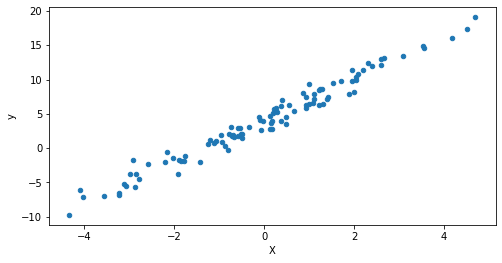

In [2]:
# Generate X as 2 + N(0,1), Generate y as 4 + 3X + N(0,1)
X = 2 * np.random.normal(0,1,100).flatten()
y = 4+3 * X + np.random.normal(0,1,100).flatten()
# Generate y = 4 + 3X
df_Xy = pd.DataFrame({'X' : X, 'y' : y})
df_Xy.plot(kind='scatter', x='X', y='y', figsize=(8,4))
plt.show()

To obtain the estimate of $\Theta$ using the normal equation

In [3]:
X_b = np.c_[np.ones((100,1)), X] # Add x0=1
# Use the normal equations to solve for Theta
Theta_hat = np.dot(np.dot(np.linalg.inv(np.dot(X_b.T, X_b)), X_b.T),y)
print(Theta_hat)

[4.07958943 3.00392812]


In [4]:
# Test the model using new X_test
lin_X = np.linspace(-8,8)
lin_X_b = np.c_[np.ones((lin_X.shape[0], 1)), lin_X]
lin_y = np.dot(lin_X_b, Theta_hat)
y_test = np.c_[lin_X, lin_y]
df_y_test = pd.DataFrame(y_test, columns=['X', 'y'])

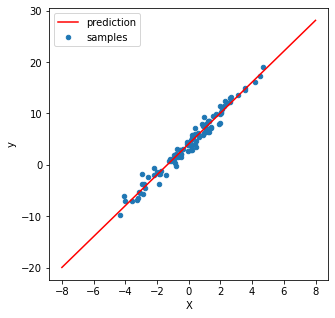

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
df_Xy.plot(kind='scatter', x='X', y='y', ax=ax)
df_y_test.plot(kind='line', x='X', y='y', ax=ax, color='red')
ax.legend(['prediction', 'samples',])
plt.show()

In [6]:
# The equivalent in sklearn is:

# Train
reg = LinearRegression()
reg.fit(X_b, df_Xy['y'])
print(reg.intercept_, reg.coef_)
# Predict
print(reg.predict(lin_X_b[:4]))

4.079589427108363 [0.         3.00392812]
[-19.95183552 -18.97096103 -17.99008655 -17.00921206]


### Gradient Descent - Batch Gradient Descent

Gradient descent is a generic optimization problem capable of finding optimal solutions to many problems. The idea is to tweak parameters iteratively to minimize a cost function. 

- Note that when using gradient descent, the features must have a similar scale or it will take longer to converge.

Hence, to use gradient descent on a linear regression problem, we revisit the cost function, the MSE: $\text{MSE} (\Theta) = \frac 1 m \sum_{i=1}^m \begin{bmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)})\end{bmatrix}^2$ and now compute the gradient w.r.t. the parameters $\theta_t$. Each expression is the partial derivative for every parameter $\theta_t$.
$$\frac{\partial}{\partial \theta_j}\text{MSE}(\theta_t) = \frac 2m \sum_{i=1}^m \begin{bmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)})\end{bmatrix} x_j^{(i)}$$

Combining them all, we obtain the gradient vector of the cost function:

$$\nabla_\theta \text{MSE}(\Theta) = \begin{bmatrix}\frac{\partial}{\partial \theta_0}\text{MSE}(\Theta)\\\frac{\partial}{\partial \theta_j}\text{MSE}(\Theta)\\\ \vdots\\\frac{\partial}{\partial \Theta}\text{MSE}(\theta_j)\end{bmatrix}= \begin{bmatrix}\frac 2m \sum_{i=1}^m \begin{bmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)})\end{bmatrix} x_0^{(i)}\\\frac 2m \sum_{i=1}^m \begin{bmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)})\end{bmatrix} x_1^{(i)}\\\ \vdots\\\frac 2m \sum_{i=1}^m \begin{bmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)})\end{bmatrix} x_n^{(i)}\end{bmatrix} = \frac 2m \mathbf X^T (X\Theta - y)$$

Hence, after going through the batch once, calculate the gradient vector $\nabla_\theta \text{MSE}(\Theta)$ and multiply by the learning rate $\eta$, and update the parameter vector:

$$\Theta^{\text{new}} = \Theta - \eta \nabla_\theta \text{MSE}(\Theta)$$

In [7]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta_hat2 = np.random.normal(0,1,2)
print(theta_hat2)

[-0.1135281 -0.3331942]


In [8]:
for itn in range(n_iterations):
    gradients = 2/m * np.dot(X_b.T, np.dot(X_b, theta_hat2) - y)
    theta_hat2 = theta_hat2 - eta * gradients
print(theta_hat2)
# Verify with normal equations
print(Theta_hat)

[4.07958943 3.00392812]
[4.07958943 3.00392812]


And it can be verified that the values obtained via gradient descent is the same as that of the normal equations.

### Gradient Descent - Stochastic Gradient Descent

Batch gradient descent uses the whole training set when running every epoch. In contrast, Stochastic gradient descent picks a random sample from the training set at every epoch and computes the gradients based only on that single instance.

In [9]:
eta = 0.1 # learning rate
n_epochs = 50
m = 100
theta_hat3 = np.random.normal(0,1,2)
print(theta_hat3)

[0.5644426  0.31508237]


By convention, we iterate by rounds of $m$ iterations, and each round is called an epoch. 

In [10]:
def learning_schedule(t):
    t0, t1 = 5,50
    return t0/(t+t1)

for eph in range(n_epochs):
    for i in range(m):
        ri = np.random.randint(m)
        X_i, y_i = X_b[ri:ri+1], y[ri:ri+1]
        np.dot(X_b.T, np.dot(X_b, theta_hat2) - y)
        gradients = 2* np.dot(X_i.T, np.dot(X_i, theta_hat3) - y_i) 
        eta = learning_schedule(eph * m + i)
        theta_hat3 = theta_hat3 - eta * gradients
print(theta_hat3)
# Verify with normal equations
print(Theta_hat)

[4.07061024 3.01864998]
[4.07958943 3.00392812]


In [11]:
# The equivalent in sklearn is:

# Train
reg2 = SGDRegressor(max_iter=1000, penalty=None, eta0=0.1)
reg2.fit(X_b, df_Xy['y'])
print(np.c_[reg2.intercept_, [0]][0] + reg2.coef_)
# Predict
print(reg2.predict(lin_X_b[:4]))

[4.13498316 3.21909169]
[-21.61775034 -20.56661836 -19.51548638 -18.4643544 ]


In [12]:
# Comparisons of all covered:
print(Theta_hat) # Normal Equations
print(reg.intercept_, reg.coef_) # sklearn.LinearRegression
print(theta_hat2) # Batch Gradient Descent
print(np.c_[reg2.intercept_, [0]][0] + reg2.coef_) # SGD Regressor

[4.07958943 3.00392812]
4.079589427108363 [0.         3.00392812]
[4.07958943 3.00392812]
[4.13498316 3.21909169]
